In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
seminar_path = "/home/alexskv/seminar_2"

In [2]:
data_path = f"{seminar_path}/data"
print(data_path)

/home/alexskv/seminar_2/data


In [3]:
import os
for root, dirs, files in os.walk(data_path):
    for d in dirs:
        print(os.path.join(root, d))


/home/alexskv/seminar_2/data/task3
/home/alexskv/seminar_2/data/task1
/home/alexskv/seminar_2/data/task4
/home/alexskv/seminar_2/data/task2
/home/alexskv/seminar_2/data/task3/images
/home/alexskv/seminar_2/data/task3/annotations
/home/alexskv/seminar_2/data/task1/images
/home/alexskv/seminar_2/data/task1/annotations
/home/alexskv/seminar_2/data/task4/images
/home/alexskv/seminar_2/data/task4/annotations
/home/alexskv/seminar_2/data/task2/images
/home/alexskv/seminar_2/data/task2/annotations


In [4]:
import json
from pathlib import Path

base_path = Path(data_path)

for annotation_file in base_path.rglob("annotations/*.json"):
    with open(annotation_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    categories = [cat["name"] for cat in data.get("categories", [])]
    num_images = len(data.get("images", []))
    
    print(f"Датасет: {annotation_file}")
    print(f"Классы: {categories}")
    print(f"Изображений: {num_images}\n")


Датасет: /home/alexskv/seminar_2/data/task3/annotations/instances_default.json
Классы: ['Правое лёгкое', 'Левое лёгкое', 'Контуры сердца', 'Купола диафрагмы и нижележащая область', 'Сложный случай', 'нельзя составить заключение', 'Иная патология', 'Гидроторакс', 'Легочно-венозная гипертензия 2 стадии и выше', 'Пневмоторакс', 'Доброкачественное новообразование', 'Перелом ребра свежий', 'Буллезное вздутие, тонкостенная киста', 'Рак лёгкого (включая дорожку к корню при наличии)', 'Кардиомегалия (отмечается всё сердце, как патология)', 'Интерстициальная пневмония.', 'Метастатическое поражение лёгких', 'Полость с уровнем жидкости', 'Грыжа пищевого отверстия диафрагмы', 'Спавшийся сегмент лёгкого при ателектазе', 'Инфильтративный туберкулёз', 'Пневмония. В том числе сегментарная и полисегментарная', 'Область распада, деструкции тканей лёгкого', 'Участок пневмофиброза', 'Кальцинаты. Каждый кальцинат выделяется отдельным контуром', 'Консолидированный перелом ребра']
Изображений: 302

Датасет: 

In [5]:
import sys
from pathlib import Path
import os

sys.path.insert(0, f"{seminar_path}/core")
print(sys.path)
from dataset import SimpleCocoDataset


['/home/alexskv/seminar_2/core', '/home/alexskv/seminar_2', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/alexskv/segm-env/lib/python3.10/site-packages']


In [6]:

pathology_ids = [i for i in range(6, 27) if i != 15]   # 6‑26, кроме 15

out_classes = [
    {"id": 1, "name": "Нормальная анатомия",
     "summable_masks": list(range(1, 3)), "subtractive_masks": []},

    {"id": 2, "name": "Патология",
     "summable_masks": pathology_ids,    "subtractive_masks": []}
]


base_names = [
    "Правое лёгкое", "Левое лёгкое", "Контуры сердца", "Купола диафрагмы и нижележащая область",
    "Сложный случай", "нельзя составить заключение", "Иная патология", "Гидроторакс",
    "Легочно-венозная гипертензия 2 стадии и выше", "Пневмоторакс", "Доброкачественное новообразование",
    "Перелом ребра свежий", "Буллезное вздутие, тонкостенная киста", "Рак лёгкого (включая дорожку к корню при наличии)",
    "Кардиомегалия (отмечается всё сердце, как патология)", "Интерстициальная пневмония.",
    "Метастатическое поражение лёгких", "Полость с уровнем жидкости", "Грыжа пищевого отверстия диафрагмы",
    "Спавшийся сегмент лёгкого при ателектазе", "Инфильтративный туберкулёз",
    "Пневмония. В том числе сегментарная и полисегментарная", "Область распада, деструкции тканей лёгкого",
    "Участок пневмофиброза", "Кальцинаты. Каждый кальцинат выделяется отдельным контуром",
    "Консолидированный перелом ребра"
]

base_classes = [{"id": i+1, "name": name} for i, name in enumerate(base_names)]
print(base_classes)

data_path = f"{seminar_path}/data/task2"
resize = (1024, 1024)

dataset = SimpleCocoDataset(data_path, base_classes, out_classes, resize=resize)


[{'id': 1, 'name': 'Правое лёгкое'}, {'id': 2, 'name': 'Левое лёгкое'}, {'id': 3, 'name': 'Контуры сердца'}, {'id': 4, 'name': 'Купола диафрагмы и нижележащая область'}, {'id': 5, 'name': 'Сложный случай'}, {'id': 6, 'name': 'нельзя составить заключение'}, {'id': 7, 'name': 'Иная патология'}, {'id': 8, 'name': 'Гидроторакс'}, {'id': 9, 'name': 'Легочно-венозная гипертензия 2 стадии и выше'}, {'id': 10, 'name': 'Пневмоторакс'}, {'id': 11, 'name': 'Доброкачественное новообразование'}, {'id': 12, 'name': 'Перелом ребра свежий'}, {'id': 13, 'name': 'Буллезное вздутие, тонкостенная киста'}, {'id': 14, 'name': 'Рак лёгкого (включая дорожку к корню при наличии)'}, {'id': 15, 'name': 'Кардиомегалия (отмечается всё сердце, как патология)'}, {'id': 16, 'name': 'Интерстициальная пневмония.'}, {'id': 17, 'name': 'Метастатическое поражение лёгких'}, {'id': 18, 'name': 'Полость с уровнем жидкости'}, {'id': 19, 'name': 'Грыжа пищевого отверстия диафрагмы'}, {'id': 20, 'name': 'Спавшийся сегмент лёгко

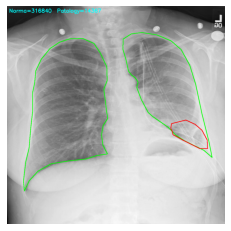

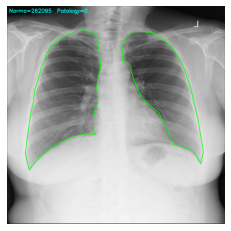

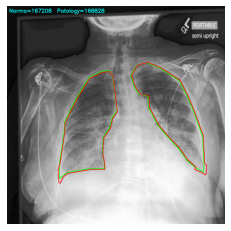

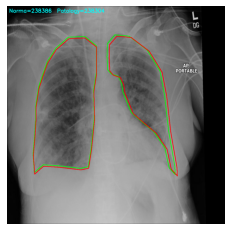

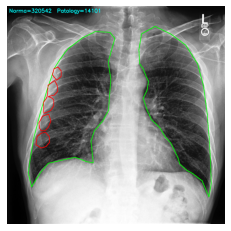

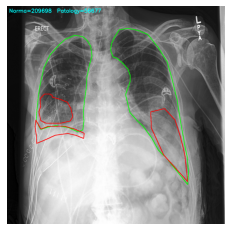

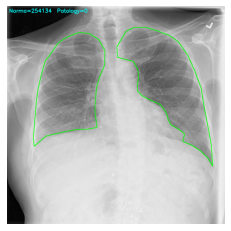

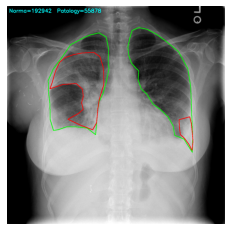

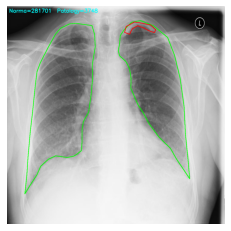

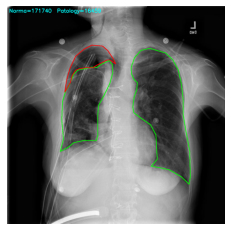

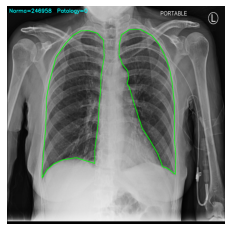

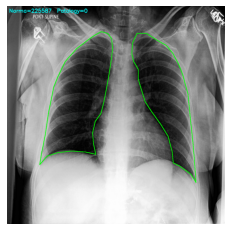

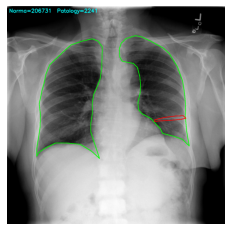

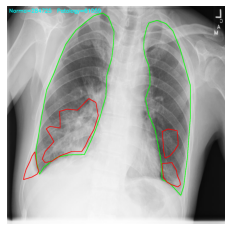

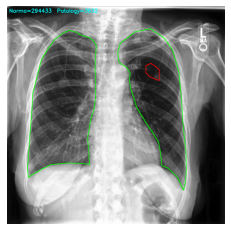

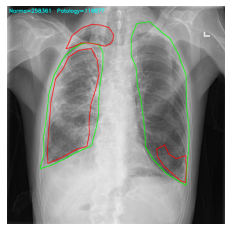

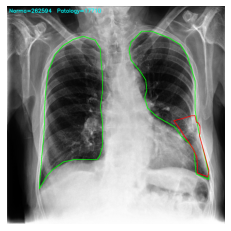

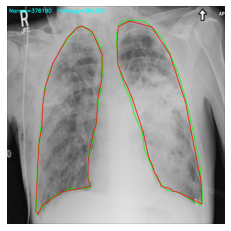

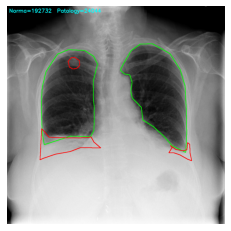

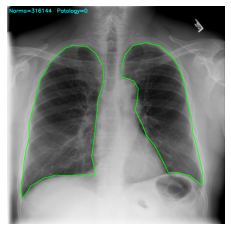

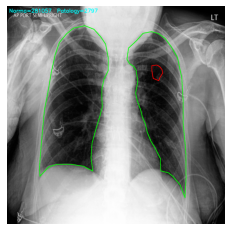

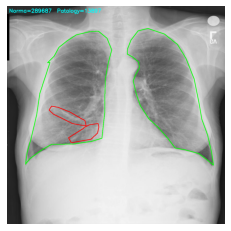

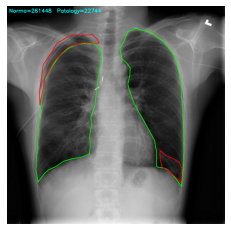

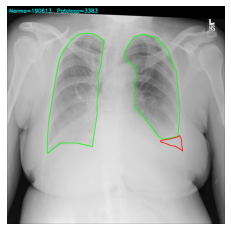

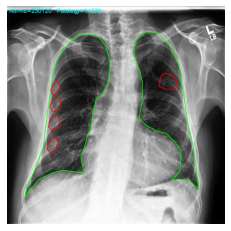

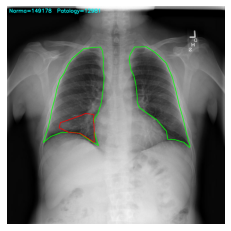

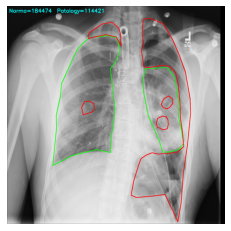

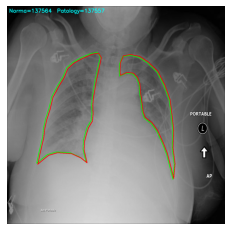

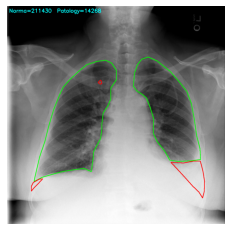

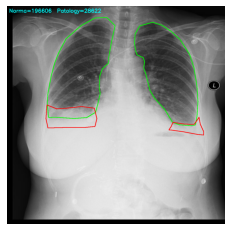

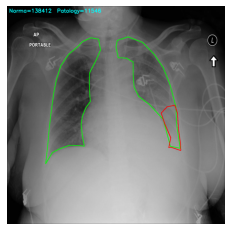

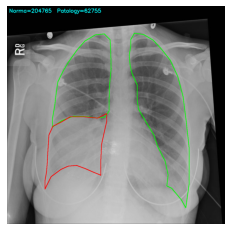

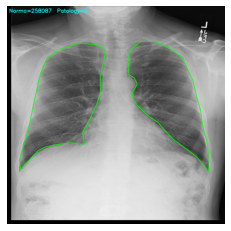

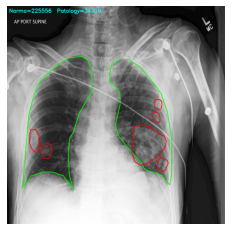

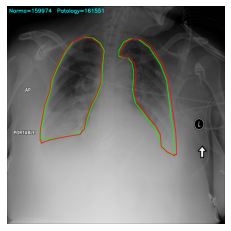

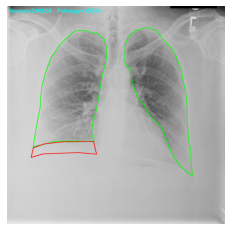

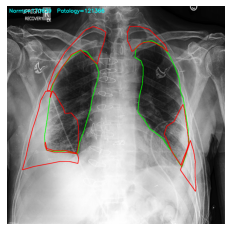

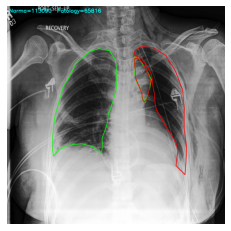

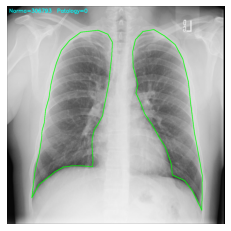

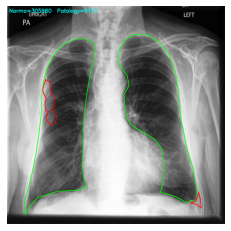

In [7]:
import random, cv2, torch
import numpy as np
import matplotlib.pyplot as plt

rnd_ids = random.sample(range(len(dataset)), 40)

colors = {1: (0, 255, 0), 2: (0, 0, 255)}  # норм = зелёный, патология = красный

for idx in rnd_ids:
    item = dataset[idx]
    img  = (item["images"][0].numpy()*255).astype(np.uint8)
    img  = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    mask = item["masks"].numpy()

    for cls in (1, 2):
        m = (mask[cls] > 0.5).astype(np.uint8)
        if m.max():
            cnts, _ = cv2.findContours(m, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(img, cnts, -1, colors[cls], 2)

    values = item["values"].tolist()  # [фон, норм, патол]
    txt = f"Norma={values[1]:.0f}  Patology={values[2]:.0f}"
    cv2.putText(img, txt, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,0), 2)

    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
import sys, json, torch, cv2, numpy as np
from pathlib import Path
from torch.utils.data import ConcatDataset, DataLoader

# ──────────────────────────────────────────────────────────────────────────────
# 1. найти все подпапки‑датасеты внутри seminar_path/data
# ──────────────────────────────────────────────────────────────────────────────

data_roots   = {p.parent.parent for p in base_path.rglob("annotations/instances_default.json")}

print(f"Найдено {len(data_roots)} датасетов:", *data_roots, sep="\n  ")


# ──────────────────────────────────────────────────────────────────────────────
# 2. создать датасеты, объединить
# ──────────────────────────────────────────────────────────────────────────────
resize = (1024, 1024)
batch_size = 16
datasets = [SimpleCocoDataset(str(d), base_classes, out_classes, resize=resize)
            for d in sorted(data_roots)]
full_ds  = ConcatDataset(datasets)

# ──────────────────────────────────────────────────────────────────────────────
# 3. DataLoader для прохода по всему набору (batch_size=1, без аугментаций)
# ──────────────────────────────────────────────────────────────────────────────
loader = DataLoader(full_ds, batch_size=batch_size, shuffle=False, num_workers=4)

# ──────────────────────────────────────────────────────────────────────────────
# 4‑а. веса для бинарного классификатора (есть / нет патологии на изображении)
# ──────────────────────────────────────────────────────────────────────────────
count_no, count_yes = 0, 0
for batch in loader:
    pathology_present = (batch["labels"][:, 2] > 0).int()
    count_yes += pathology_present.sum().item()
    count_no  += (1 - pathology_present).sum().item()
cls_total = count_no + count_yes
w_cls_yes = cls_total / (2 * count_yes)
w_cls_no  = cls_total / (2 * count_no)

print(f"Изображений без патологии: {count_no}")
print(f"Изображений с патологией : {count_yes}")
print(f"Классификационные веса   : no={w_cls_no:.4f}, yes={w_cls_yes:.4f}")

# ──────────────────────────────────────────────────────────────────────────────
# 5‑б. веса для сегментации (фон, норма, патология) «one‑vs‑background»
# ──────────────────────────────────────────────────────────────────────────────
pix_totals = torch.zeros(3)      # [фон, норма, патология]
total = 0 
for batch in loader:
    pix_totals += batch["values"].sum(dim=0)   # суммируем по B
    total+=1
seg_total = total*batch_size*resize[0]**2
w_seg = seg_total / (pix_totals)  
w_seg = w_seg/2

print("Пиксели (фон / норма / патология):", pix_totals.long().tolist())
print("Сегментационные веса              :", [round(x.item(), 4) for x in w_seg])


Найдено 4 датасетов:
  /home/alexskv/seminar_2/data/task1
  /home/alexskv/seminar_2/data/task2
  /home/alexskv/seminar_2/data/task3
  /home/alexskv/seminar_2/data/task4
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [ ]:
#Обратите внимание как принципиально отличаются веча при классифкации и сегментации. 
#Так же обратите внимание на вес фона близкий к 0.5, как бы вы могли это интерпритировать?
# Запомните жти веса они нам понадобятся. 
#Изображений без патологии: 267
#Изображений с патологией : 941
#Классификационные веса   : no=2.2622, yes=0.6419
#Пиксели (фон / норма / патология): [961422144, 291706496, 54308168]
#Сегментационные веса              : [0.4533, 1.494, 8.0248]